In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc

plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':    # 맥
    rc( 'font', family='AppleGothic' )
elif platform.system() == 'Windows': # 윈도우
    fontPath = 'c:/Windows/Fonts/malgun.ttf'
    fontName = font_manager.FontProperties( fname=fontPath ).get_name()
    rc( 'font', family=fontName )
else:
    print('알수없는 시스템. 미적용')
    
pd.set_option('display.expand_frame_repr', False)
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
non_out_kospi_200_items = pd.read_excel('./non_out_data.xlsx')

In [4]:
def data_sp(data):
    com_name_set = list(set(data.Name))
    
    ## 18년도 3,6월 이전 이후로 나누기
    train_set = pd.DataFrame()
    test_set = pd.DataFrame()
    for i in range(len(com_name_set)):
        sub_set = data[ data.Name == com_name_set[i]]
        train_set = train_set.append(sub_set[:-3])
        test_set = test_set.append(sub_set[-3:])
    return train_set , test_set

In [5]:
ls = []
for i in list(set(non_out_kospi_200_items.Name)):
    if len(kospi_200_items[kospi_200_items.Name == i]) < 50:
        ls.append(i)
        
        

In [6]:
for i in ls:
    non_out_kospi_200_items2 = non_out_kospi_200_items[non_out_kospi_200_items.Name != i]

In [7]:
train,test = data_sp(non_out_kospi_200_items2)

In [8]:
print(train.shape,test.shape)

(8776, 19) (537, 19)


In [9]:
cols = ['변동성 (20일)', '거래량 (20일 평균)(주)', '외국인보유비중(보통+우선)(%)', '공매도거래량 (20일)(주)',
       '순매수수량(개인)(20일합산)(주)', '순매수수량(기관계)(20일합산)(주)', '순매수수량(외국인계)(20일합산)(주)',
       'PER(IFRS-연결)', 'PBR(IFRS-연결)', 'PSR(IFRS-연결)', '변동성 (20일)변화율','외국인보유비중(보통+우선)(%)변화율',
        'PER(IFRS-연결)변화율', 'PBR(IFRS-연결)변화율','PSR(IFRS-연결)변화율']

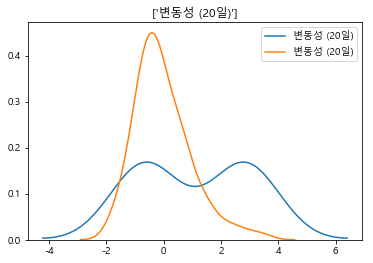

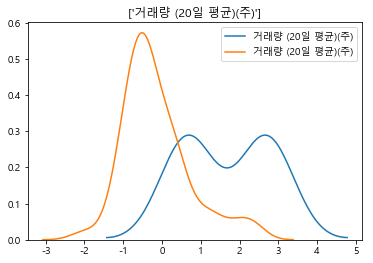

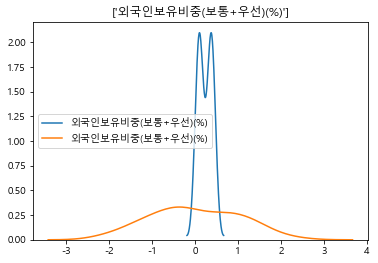

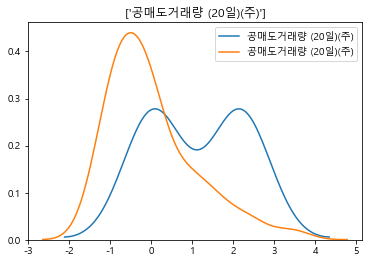

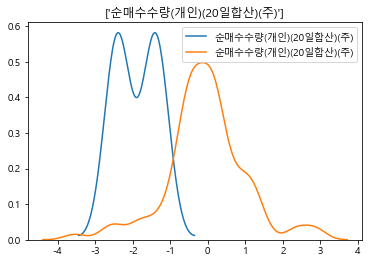

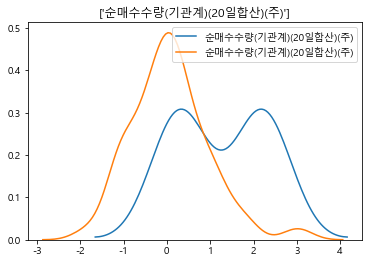

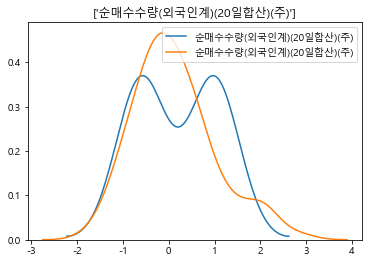

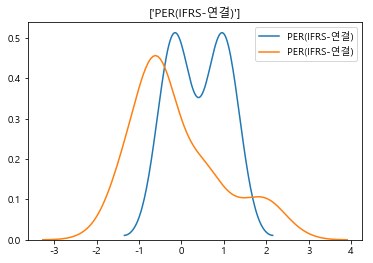

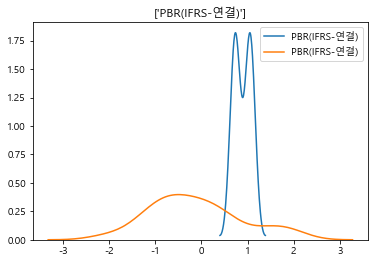

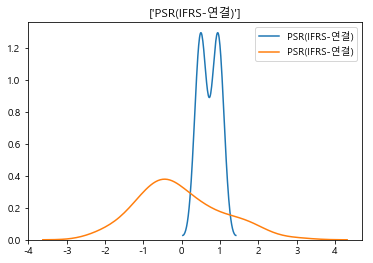

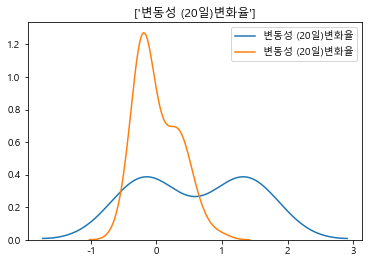

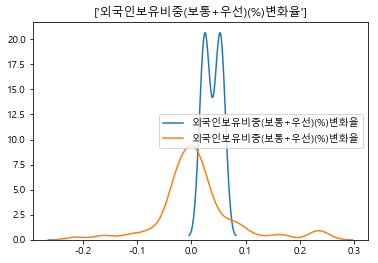

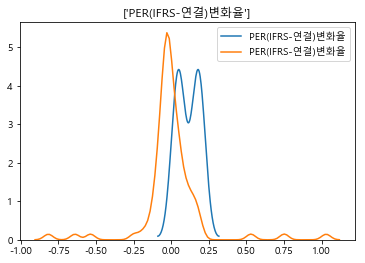

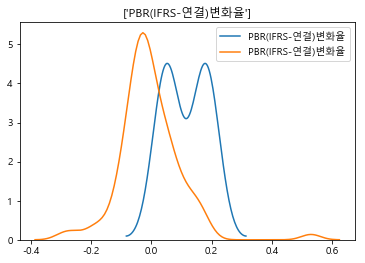

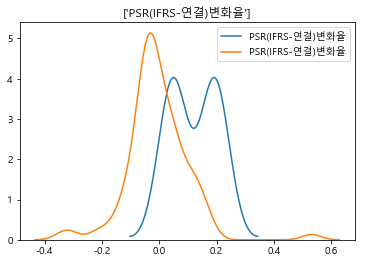

In [10]:
for i in cols:
        sns.kdeplot(data=non_out_kospi_200_items2[non_out_kospi_200_items2['수익률 (1개월)(%)'] == 1][i])
        sns.kdeplot(data=non_out_kospi_200_items2[non_out_kospi_200_items2['수익률 (1개월)(%)'] == 0][i])
        plt.title([i])
        plt.show()     

In [11]:
## train test를 X,Y 나누기
X_train = train[cols]

X_test = test[cols]

Y_train = train['1개월 수익률(2)']
Y_test = test['1개월 수익률(2)']

 Modeling
 
 1 비율: 0.40185185185185185
 

In [12]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [13]:
for col in cols:
    XX_train = X_train[[col]]
    XX_test = X_test[[col]]

    model=LogisticRegression()
    model.fit(XX_train,Y_train)
    prediction7=model.predict(XX_test)
    print('{}  '.format(col),'The accuracy of the LogisticRegression is',metrics.accuracy_score(prediction7,Y_test),'\n',prediction7)

변동성 (20일)   The accuracy of the LogisticRegression is 0.409683426443203 
 [1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 0 1 0
 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 0 1 0 1 1 0 0 1 1 1 1
 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0
 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1
 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 0 1 0 0 0 1 1 1
 1 1 1 1 1 1 1 0 1 1 0 1 1